# Housing cluster analysis

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
# Loading in data
df = pd.read_csv("housing.csv")

In [22]:
# Visualization of the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
# Getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
# Convert MSSubClass to object data type, because this is actually an object column classified via numerical data
df['MSSubClass'] = df['MSSubClass'].astype('object')

# Verify the data type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
# Select only numerical columns
df_num = df.select_dtypes(include=['float', 'int'])

# Exclude columns with 5 or fewer unique values
df_num = df_num.loc[:, df_num.nunique() > 5]

# Display the resulting DataFrame
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BedroomAbvGr   1460 non-null   int64  
 17  TotRmsAbvGrd   1460 non-null   int64  
 18  GarageYr

In [26]:
# The column Id does not add to the information
df_num.drop(columns=['Id'], inplace=True)

In [27]:
# Dropping all NaN row values
df_num.dropna(inplace=True)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1121 non-null   float64
 1   LotArea        1121 non-null   int64  
 2   OverallQual    1121 non-null   int64  
 3   OverallCond    1121 non-null   int64  
 4   YearBuilt      1121 non-null   int64  
 5   YearRemodAdd   1121 non-null   int64  
 6   MasVnrArea     1121 non-null   float64
 7   BsmtFinSF1     1121 non-null   int64  
 8   BsmtFinSF2     1121 non-null   int64  
 9   BsmtUnfSF      1121 non-null   int64  
 10  TotalBsmtSF    1121 non-null   int64  
 11  1stFlrSF       1121 non-null   int64  
 12  2ndFlrSF       1121 non-null   int64  
 13  LowQualFinSF   1121 non-null   int64  
 14  GrLivArea      1121 non-null   int64  
 15  BedroomAbvGr   1121 non-null   int64  
 16  TotRmsAbvGrd   1121 non-null   int64  
 17  GarageYrBlt    1121 non-null   float64
 18  GarageArea   

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialising the transformer
std_scaler = StandardScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_data = std_scaler.fit_transform(df_num)

## Wards method

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cut_tree
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

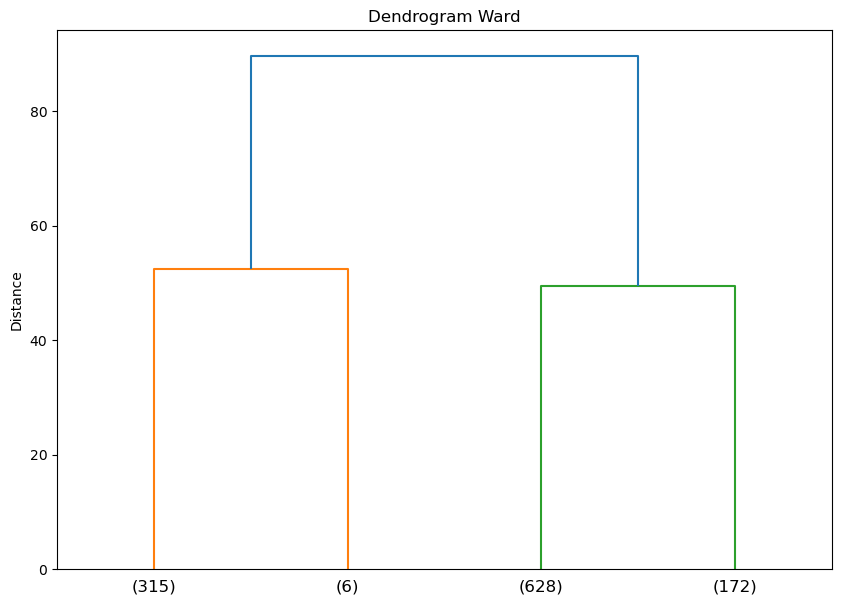

In [30]:
# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')  # Ward minimizes variance

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, truncate_mode='level', p=1)
plt.title("Dendrogram Ward")
plt.ylabel("Distance")
plt.show()

In [31]:
# Extract clusters
cluster_labels = fcluster(linked, t=3, criterion='maxclust')

# Add clusters to the DataFrame
df_num['cluster_agglomerative'] = cluster_labels
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,cluster_agglomerative
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,208500,1
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,181500,1
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,223500,1
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,140000,1
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,250000,3


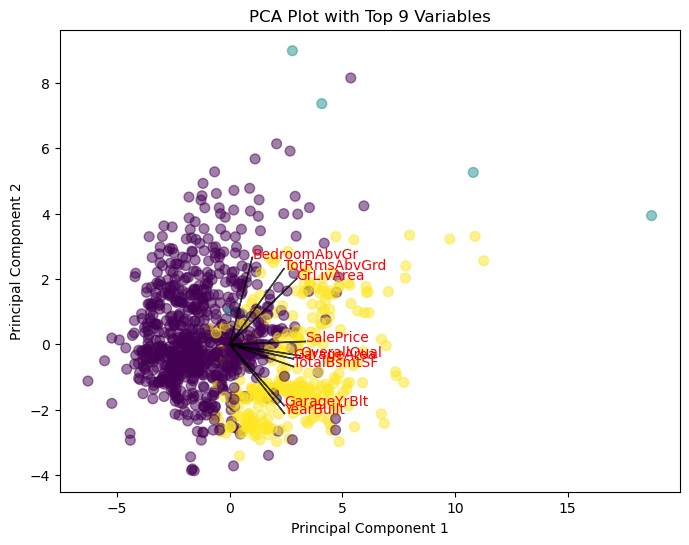

In [32]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Get the explained variance ratios for the selected components
explained_variances = pca.explained_variance_ratio_

# Get the principal component vectors (also known as loadings)
loadings = pca.components_.T * np.sqrt(explained_variances) * 20

# Compute the importance (magnitude) of each variable
importance = np.linalg.norm(loadings, axis=1)

# Select the indices of the top 4 variables
top_indices = np.argsort(importance)[-9:]

# Plot PCA with only the top 4 variables
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, s=50, alpha=0.5, cmap='viridis')
plt.title("PCA Plot with Top 9 Variables")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Add the top 4 variable vectors to the plot
for i in top_indices:
    feature = df_num.columns[i]
    plt.annotate(feature,  # variable name
                 (loadings[i, 0], loadings[i, 1]),
                 color='red',
                 fontsize=10)
    plt.arrow(0, 0,
              loadings[i, 0],
              loadings[i, 1],
              color='black',
              alpha=0.7, 
              width=0.01)

# Show the plot
plt.show()

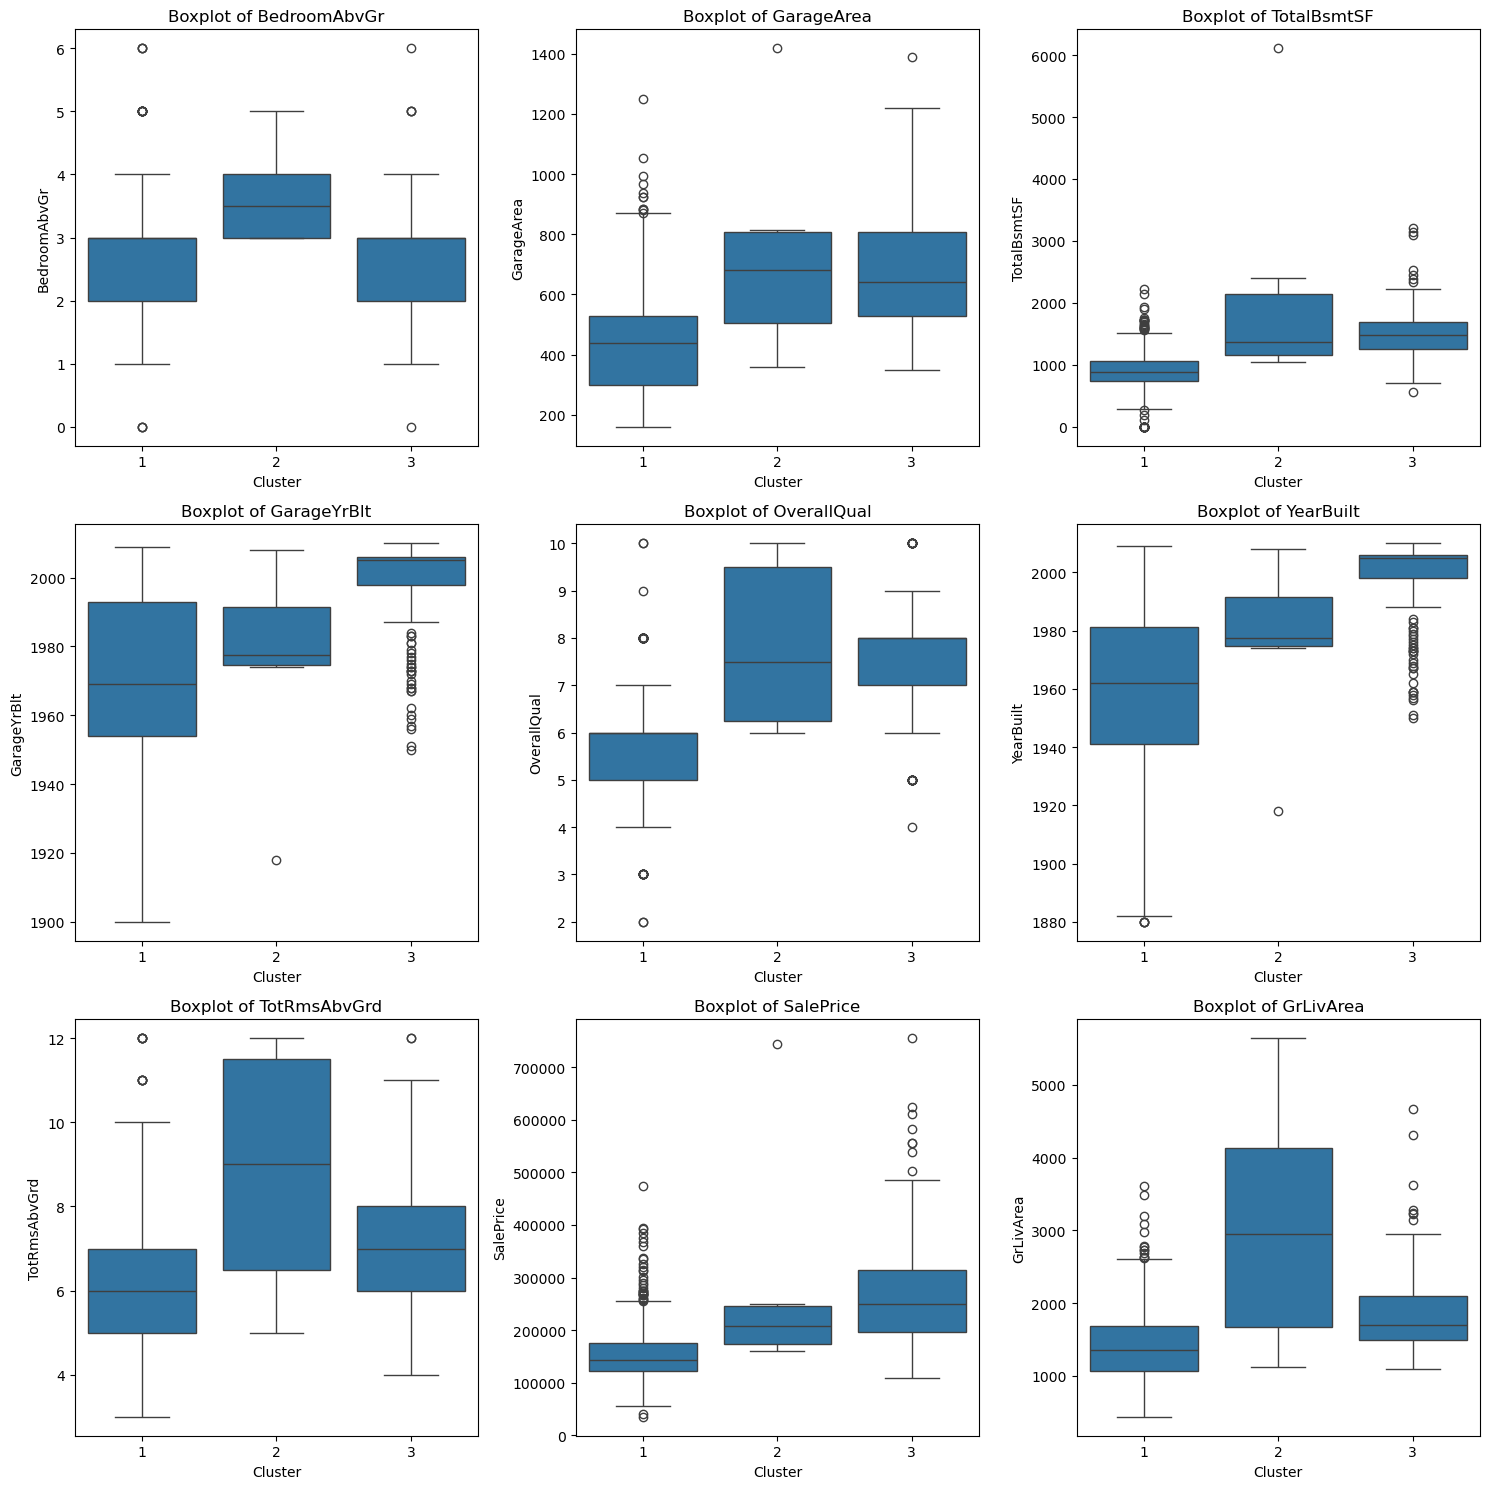

In [33]:
# Number of subplots (adjustable)
n_subplots = len(top_indices)

# Calculate the number of rows needed
n_cols = 3
n_rows = -(-n_subplots // n_cols)  # Ceiling division to determine rows

# Create subplots with 3 columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through top 4 indices and create boxplots
for ax, i in zip(axes, top_indices):
    col = df_num.columns[i]
    sns.boxplot(x='cluster_agglomerative', y=col, data=df_num, ax=ax)
    ax.set_title(f"Boxplot of {col}")
    ax.set_xlabel("Cluster")
    ax.set_ylabel(col)

# Remove unused subplots if any
for ax in axes[len(top_indices):]:
    ax.remove()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

3 groups seem reasonable:
- one group of older houses
- one group of newer, more high quality, expensive houses
- one group of very big houses (outliers)

# K means

The Elbow Method - We see that the break point is at 2 or 3 clusters (because that is where the break exists)

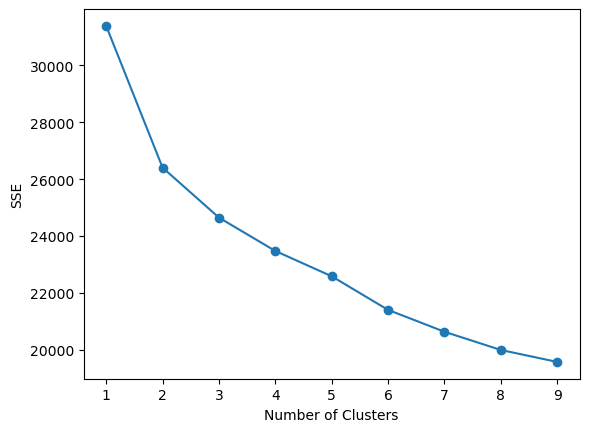

In [34]:
from sklearn.cluster import KMeans 

sse = []
for k in range(1, 10):
    kmeans = KMeans(init = "random", n_clusters = k)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_) # sum of squared distances of samples to their closest cluster center


plt.plot(range(1, 10), sse, marker='o')
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


Silhouette test - the split into 2 groups yields the highest score

In [35]:
from sklearn.metrics import silhouette_score
for k in range(2,7):
    kmeans=KMeans(n_clusters= k, random_state=42)
    labels= kmeans.fit_predict(scaled_data)
    score= silhouette_score(scaled_data, labels)
    print(f'Silhouette Score for {k} is {score}')

Silhouette Score for 2 is 0.2406386209482698
Silhouette Score for 3 is 0.16855589359081907
Silhouette Score for 4 is 0.15684948917583813
Silhouette Score for 5 is 0.11235627841764721
Silhouette Score for 6 is 0.0929692575082183


In [36]:
# Initialise the model
my_kmeans_2 = KMeans(n_clusters= 2, #choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Initialise the model
my_kmeans_3 = KMeans(n_clusters= 3, #choose the number of k here
                   n_init="auto",
                   random_state = 123)


# Initialise the model
my_kmeans_4 = KMeans(n_clusters= 4, #choose the number of k here
                   n_init="auto",
                   random_state = 123)


# Fit the model to the data
my_kmeans_2.fit(scaled_data)
my_kmeans_3.fit(scaled_data)
my_kmeans_4.fit(scaled_data)

# Obtain the cluster output
clusters_2 = my_kmeans_2.labels_
clusters_3 = my_kmeans_3.labels_
clusters_4 = my_kmeans_4.labels_

# Attach the cluster output to our original DataFrame
df_num["cluster_kmeans"] = clusters_2
df_num["cluster_kmeans"] = clusters_3
df_num["cluster_kmeans"] = clusters_4

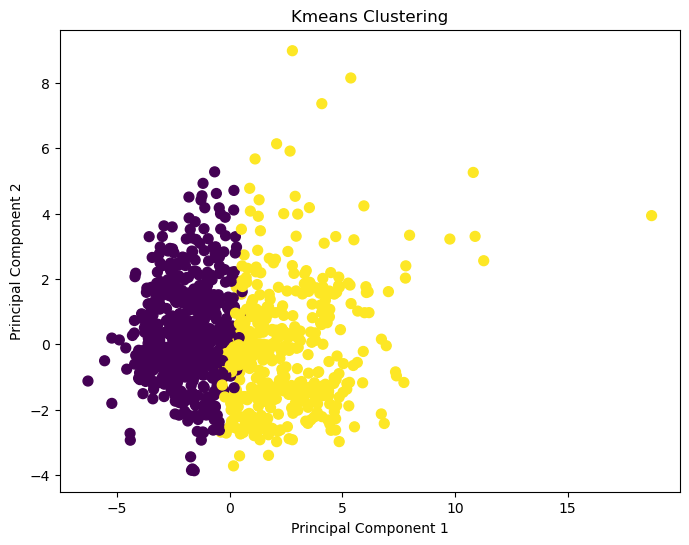

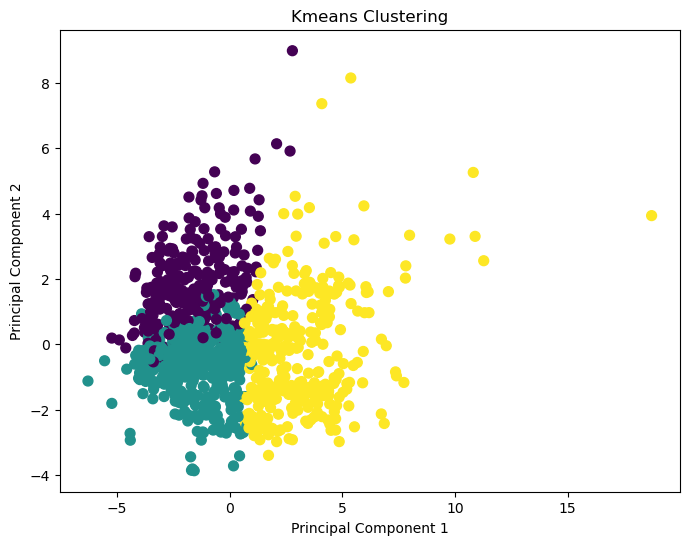

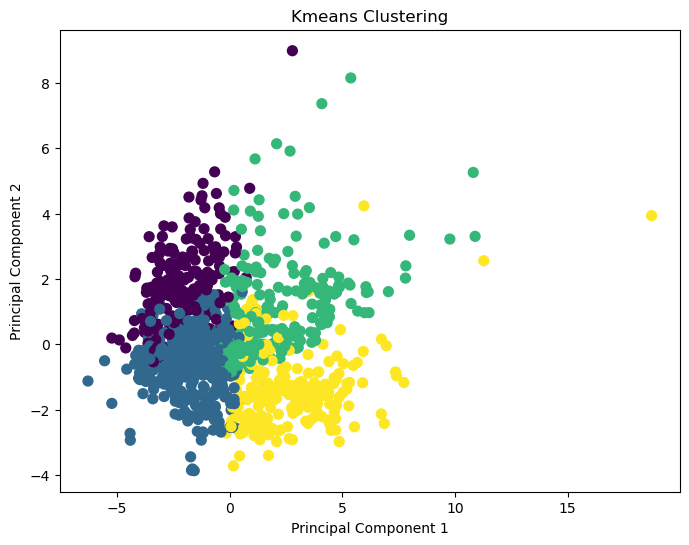

In [37]:
# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters_2, cmap='viridis', s=50)
plt.title("Kmeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters_3, cmap='viridis', s=50)
plt.title("Kmeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters_4, cmap='viridis', s=50)
plt.title("Kmeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()